In [127]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [128]:
link = "https://s3.amazonaws.com/codecademy-content/courses/beautifulsoup/cacao/index.html"
r = requests.get(link)

soup = BeautifulSoup(r.content, "html.parser")

In [129]:
ratings = []
soups = soup.find_all(attrs={"class":"Rating"})
ratings.append(soups[0].get_text())
for rating in soups[1:]:
    ratings.append(float(rating.get_text()))


In [130]:
chocolatier = [x.get_text() for x in soup.find_all(attrs={"class":"Company"})]
choco = dict(zip(chocolatier, ratings))

In [131]:
plt.hist(ratings[1:])
plt.show()

(array([   4.,   13.,   32.,  141.,  259.,  644.,  602.,   98.,    0.,    2.]),
 array([ 1. ,  1.4,  1.8,  2.2,  2.6,  3. ,  3.4,  3.8,  4.2,  4.6,  5. ]),
 <a list of 10 Patch objects>)

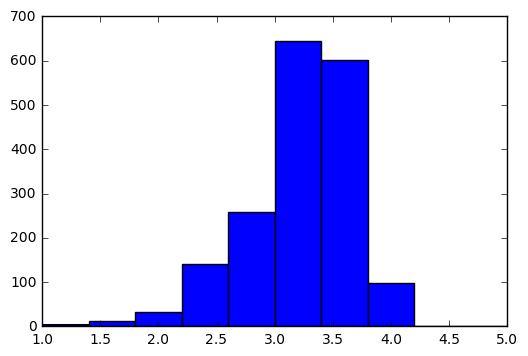

In [133]:
c_per = [float(x.get_text()[:2])*0.01 for x in soup.find_all(attrs={"class":"CocoaPercent"})[1:]]
cacao_df = pd.DataFrame({"Company" : chocolatier[1:], "Rating" : ratings[1:], "CocoaPercent" : c_per})

In [134]:
mean_vals = cacao_df.groupby("Company").Rating.mean()
ten_best = mean_vals.nlargest(10)
print(ten_best)

Company
Tobago Estate (Pralus)                  4.000000
Heirloom Cacao Preservation (Zokoko)    3.875000
Ocelot                                  3.875000
Amedei                                  3.846154
Matale                                  3.812500
Patric                                  3.791667
Idilio (Felchlin)                       3.775000
Acalli                                  3.750000
Chocola'te                              3.750000
Christopher Morel (Felchlin)            3.750000
Name: Rating, dtype: float64


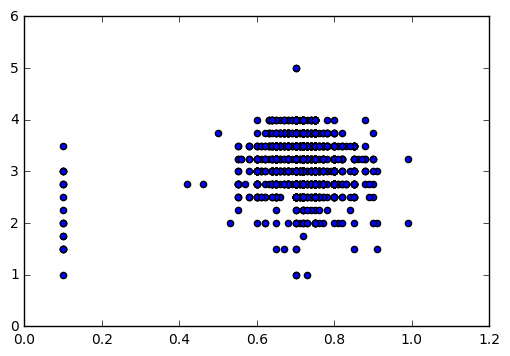

In [135]:
plt.clf()
plt.scatter(cacao_df.CocoaPercent, cacao_df.Rating)
plt.show()

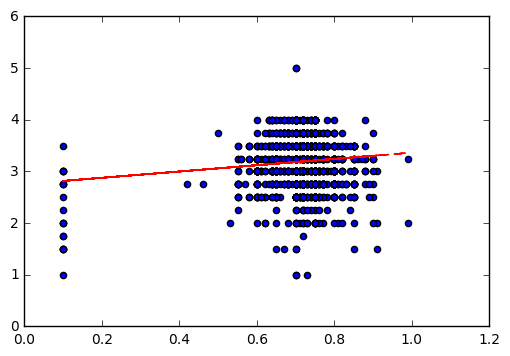

In [136]:
z = np.polyfit(cacao_df.CocoaPercent, cacao_df.Rating, 1)
line_function = np.poly1d(z)
plt.plot(cacao_df.CocoaPercent, line_function(cacao_df.CocoaPercent), "r--")
plt.scatter(cacao_df.CocoaPercent, cacao_df.Rating)
plt.show()